In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Borrar warnings

In [2]:
df = pd.read_csv("bank_transactions_data_2.csv")

In [3]:
df.sample(3)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
744,TX000745,AC00326,348.64,2023-06-09 17:12:09,Debit,San Jose,D000221,134.222.122.238,M098,Online,57,Retired,128,1,3274.96,2024-11-04 08:11:22
273,TX000274,AC00455,178.87,2023-05-23 16:03:54,Debit,Baltimore,D000663,134.247.5.188,M001,Online,35,Doctor,180,1,5241.23,2024-11-04 08:10:16
1217,TX001218,AC00381,23.38,2023-09-25 18:46:41,Debit,Memphis,D000412,6.204.110.7,M062,Branch,32,Engineer,89,1,9968.49,2024-11-04 08:09:41


- **TransactionID (ID de Transacción):** Identificador alfanumérico único para cada operación.
- **AccountID (ID de Cuenta):** Identificador único de la cuenta.
- **TransactionAmount (Monto de la Transacción):** Valor monetario involucrado en la operación.
- **TransactionDate (Fecha y Hora de la Transacción):** Marca de tiempo de la operación.
- **TransactionType (Tipo de Transacción):** Indica si la transacción es "Crédito" o "Débito".
- **Location (Ubicación):** Localización geográfica (ciudades de EE. UU.).
- **DeviceID (ID de Dispositivo):** Identificador del dispositivo utilizado.
- **IP Address (Dirección IP):** Dirección de red asociada a la transacción.
- **MerchantID (ID de Comercio/Proveedor):** Identificador único del comercio.
- **AccountBalance (Saldo de la Cuenta):** Saldo disponible luego de la transacción.
- **PreviousTransactionDate (Fecha de Transacción Anterior):** Marca de tiempo de la operación previa.
- **Channel (Canal):** Medio por el cual se efectuó (Online, ATM, Sucursal).
- **CustomerAge (Edad del Cliente):** Edad del titular de la cuenta.
- **CustomerOccupation (Ocupación del Cliente):** Ocupación declarada del cliente.
- **TransactionDuration (Duración de la Transacción):** Tiempo en segundos que tomó completarse.
- **LoginAttempts (Intentos de Inicio de Sesión):** Cantidad de intentos fallidos previos al acceso.


In [4]:
df.columns = ['ID_Trans', 'ID_Cuenta', 'Monto', 'Fecha', 'Tipo', 'Ubicacion', 'ID_Disposit', 'Direccion_IP', 'ID_Comercio', 'Canal', 'Edad_Cliente', 'Ocupacion', 'Duracion', 'Intentos_Login', 'Saldo', 'Fecha_Trans_Ant']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Trans         2512 non-null   object 
 1   ID_Cuenta        2512 non-null   object 
 2   Monto            2512 non-null   float64
 3   Fecha            2512 non-null   object 
 4   Tipo             2512 non-null   object 
 5   Ubicacion        2512 non-null   object 
 6   ID_Disposit      2512 non-null   object 
 7   Direccion_IP     2512 non-null   object 
 8   ID_Comercio      2512 non-null   object 
 9   Canal            2512 non-null   object 
 10  Edad_Cliente     2512 non-null   int64  
 11  Ocupacion        2512 non-null   object 
 12  Duracion         2512 non-null   int64  
 13  Intentos_Login   2512 non-null   int64  
 14  Saldo            2512 non-null   float64
 15  Fecha_Trans_Ant  2512 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 314.1+ KB


In [6]:
df.duplicated().sum() # Mostrar número de filas duplicadas.

0

In [7]:
df.sample(3)

,ID_Trans,ID_Cuenta,Monto,Fecha,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,Ocupacion,Duracion,Intentos_Login,Saldo,Fecha_Trans_Ant
2256,TX002257,AC00314,317.53,2023-02-24 18:25:34,Debit,Miami,D000034,137.33.78.168,M070,Online,44,Engineer,104,1,6237.68,2024-11-04 08:06:39
1884,TX001885,AC00071,451.31,2023-12-04 16:57:39,Debit,Fort Worth,D000020,68.254.244.208,M046,ATM,62,Retired,166,5,2963.29,2024-11-04 08:07:38
838,TX000839,AC00007,637.75,2023-07-24 16:07:05,Debit,Dallas,D000561,184.57.159.204,M028,Branch,79,Retired,152,1,4202.92,2024-11-04 08:08:51


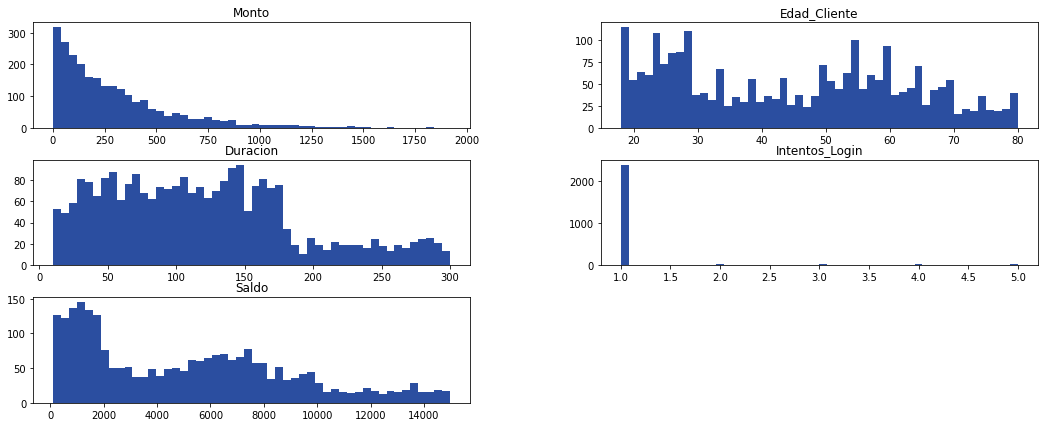

In [8]:
_= df.hist(grid=False, figsize=[18,7], color='#2B4EA0', bins=50)

In [9]:
df['Tipo'].value_counts()

Debit     1944
Credit     568
Name: Tipo, dtype: int64

In [10]:
df.sample(3)

,ID_Trans,ID_Cuenta,Monto,Fecha,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,Ocupacion,Duracion,Intentos_Login,Saldo,Fecha_Trans_Ant
815,TX000816,AC00365,280.99,2023-02-20 18:03:01,Debit,Houston,D000374,11.167.243.171,M096,Branch,45,Engineer,29,1,9733.59,2024-11-04 08:07:24
2106,TX002107,AC00066,126.83,2023-02-20 16:40:25,Debit,Austin,D000593,21.122.39.207,M007,Branch,57,Retired,39,1,6100.98,2024-11-04 08:10:31
2168,TX002169,AC00460,431.08,2023-07-17 18:24:15,Debit,Albuquerque,D000339,145.179.219.57,M013,Branch,59,Retired,25,1,6760.22,2024-11-04 08:06:52


Comienzo a reemplazar los valores de los campos por variables numericas. En el primer caso, el campo 'Tipo' al ser posible dos unicos valores codifico asignando a un tipo de variable 0 y 1 a la otra. 

In [11]:
df['Tipo'].value_counts()

Debit     1944
Credit     568
Name: Tipo, dtype: int64

In [12]:
df['Tipo'] = df['Tipo'].replace({
    'Debit': 0,
    'Credit': 1,})

In [13]:
df['Canal'].value_counts()

Branch    868
ATM       833
Online    811
Name: Canal, dtype: int64

In [14]:
df['Canal'] = df['Canal'].replace({
    'Branch': 0,
    'ATM': 1,
    'Online': 2})

En el campo ubicación, para no generar tantas columnas, utilizo una codificacion por frecuencia.

In [15]:
df['Ubicacion'].value_counts().head(5) # Muestro solo los 7 mas frecuentes para no mostrar una fila con muchos valores.

Fort Worth       70
Los Angeles      69
Oklahoma City    68
Charlotte        68
Tucson           67
Name: Ubicacion, dtype: int64

In [16]:
# Codificación por Frecuencia, para no generar tantas columnas.
frecuencia_Ub = df['Ubicacion'].value_counts()
df['Ubicacion'] = df['Ubicacion'].map(frecuencia_Ub)

En el caso del campo 'Fecha' aplico un timestamp numérico que convierte una fecha completa a un entero, ese número representa cuántos segundos pasaron desde una fecha base estándar (generalmente es 1 de enero de 1970) El resultado final es un entero grande que expresa tiempo absoluto.

In [17]:
df['Fecha'] = pd.to_datetime(df['Fecha']) # Convierte el campo desde un string a datetime de pandas.
df['Fecha_ts'] = df['Fecha'].astype('int64') // 1e9 # Convierte a int64 dando la cantidad de nanosegundos desde 01/01/1970 luego divide por 1e9 para dejarlo en segundos.

In [18]:
# Tambien creo nuevas columnas extrayendo valores del campo fecha
df['año'] = df['Fecha'].dt.year
df['mes'] = df['Fecha'].dt.month
df['dia'] = df['Fecha'].dt.day
df['hora'] = df['Fecha'].dt.hour
df['minuto'] = df['Fecha'].dt.minute

In [19]:
df = df.drop('Fecha', axis=1) # Borro la columna fecha puesto que ya cree nuevas numericas para tal fin.

El campo ID_Disposit y Direccion_IP los voy a tener en cuenta, por eso debo convertirlos a numericos, usando codificación por frecuencia.

In [20]:
df['ID_Disposit'].value_counts().head(5)

D000697    9
D000203    9
D000548    9
D000663    9
D000142    9
Name: ID_Disposit, dtype: int64

In [21]:
freq = df['ID_Disposit'].value_counts()
df['ID_Disposit'] = df['ID_Disposit'].map(freq)

In [22]:
df['Direccion_IP'].value_counts().head(5)

200.136.146.93    13
49.31.186.82      11
166.79.195.157    10
9.230.41.239      10
173.135.78.201    10
Name: Direccion_IP, dtype: int64

In [23]:
freq = df['Direccion_IP'].value_counts()
df['Direccion_IP'] = df['Direccion_IP'].map(freq)

In [24]:
df['ID_Comercio'].value_counts().head(5) # Tambien solo muestro los 5 mas frecuentes.

M026    45
M066    34
M065    33
M013    33
M014    33
Name: ID_Comercio, dtype: int64

In [25]:
freq = df['ID_Comercio'].value_counts()
df['ID_Comercio'] = df['ID_Comercio'].map(freq)

In [26]:
df['Fecha_Trans_Ant'] = pd.to_datetime(df['Fecha_Trans_Ant'])
df['Fecha_Trans_Ant'] = df['Fecha_Trans_Ant'].astype('int64') // 1e9

In [27]:
df.sample()

,ID_Trans,ID_Cuenta,Monto,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,...,Duracion,Intentos_Login,Saldo,Fecha_Trans_Ant,Fecha_ts,año,mes,dia,hora,minuto
1441,TX001442,AC00441,491.1,1,63,2,5,25,2,35,...,125,1,7833.85,1.730708e+09,1.685981e+09,2023,6,5,16,8


In [28]:
df['Ocupacion'].value_counts()

Student     657
Doctor      631
Engineer    625
Retired     599
Name: Ocupacion, dtype: int64

In [29]:
df['Ocupacion'] = df['Ocupacion'].replace({
    'Student': 0,
    'Doctor': 1,
    'Engineer': 2,
    'Retired': 3})

In [30]:
df = df.drop(['ID_Trans'], axis=1)
df = df.drop(['ID_Cuenta'], axis=1)

In [31]:
df.sample(5)

,Monto,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,Ocupacion,Duracion,Intentos_Login,Saldo,Fecha_Trans_Ant,Fecha_ts,año,mes,dia,hora,minuto
1870,369.44,0,63,2,2,27,2,34,2,19,1,5018.67,1.730708e+09,1.700500e+09,2023,11,20,17,11
19,71.48,1,54,6,7,25,2,18,0,169,1,6568.59,1.730708e+09,1.686248e+09,2023,6,8,18,18
2180,498.59,0,67,5,9,30,2,57,3,138,1,2619.46,1.730708e+09,1.698086e+09,2023,10,23,18,41
1385,23.01,0,55,3,5,24,0,63,3,166,1,5958.75,1.730708e+09,1.686336e+09,2023,6,9,18,33
834,193.82,0,61,8,6,29,0,37,2,176,1,3886.77,1.730708e+09,1.682013e+09,2023,4,20,17,52


#### Creacion de nuevas caracteristicas con los datos:

Creo nueva columna donde para cada fila veo cuánto representa el Monto respecto del Saldo disponible. (El +1 es para evitar errores cuando el saldo es igual a 0). Si el valor es alto (ej: 2, 5, 10) significa que el monto de la transacción es mucho mayor que el saldo. Si el valor está cerca de 1 el monto es parecido al saldo y si el valor es menor a 1 quiere decir que el monto es más chico que el saldo. Cuando un monto supera el saldo disponible suelen ser operaciones menos comunes y a veces están asociadas a un comportamiento irregular.

In [32]:
df['monto_vs_saldo'] = df['Monto'] / (df['Saldo'] + 1) 

Esta nueva caracteristica, mide cuántas ubicaciones distintas usa cada dispositivo. La nueva columna identifica cuantas ubicaciones diferentes utilizo ese dispositivo en todo el historial, para analizar que un dispositivo que siempre opera desde una sola ubicación puede ser normal en cambio un dispositivo que aparece con muchas ubicaciones distintas puede indicar uso compartido, posible robo de credenciales, comportamiento inusual.

In [33]:
# Agrupo por ID_Disposit, dentro de cada grupo calcula el numero de ubicaciones unicas (nunique) usadas por ese dispositivo
df['ubicaciones_distintas'] = df.groupby('ID_Disposit')['Ubicacion'].transform('nunique')

La proxima nueva caracteristica, suma cuántas veces aparece una dirección IP en el historial del dispositivo. En definitiva muestra cuantas transacciones (o registros) tiene ese dispositivo en total.

In [34]:
# Agrupo por ID_Disposit, dentro de cada grupo calculo la direccion de IP 
df['IP.Freqxcliente'] = df.groupby('ID_Disposit')['Direccion_IP'].transform('count')

Un dispositivo que cambia IP muy seguido suele ser sospechoso, puede indicar VPN, proxys, movimientos fuera del patrón habitual o un acceso no autorizado. El primer registro de cada dispositivo siempre marca 1 (no hay historial anterior), lo cual es normal: dispositivos nuevos también representan mayor riesgo. En resumen indica si el dispositivo está usando una IP diferente de la inmediatamente anterior.

In [38]:
from sklearn.ensemble import IsolationForest

In [39]:
import numpy as np
print("Recreando columna Fraude para evaluación técnica...")
df['Fraude'] = np.random.choice([0,1], size=len(df), p=[0.95, 0.05])

Recreando columna Fraude para evaluación técnica...


In [42]:
data = df
X = data.drop(columns=['Fraude']) # Sin la columna fraude
y = df['Fraude']

In [43]:
from sklearn.model_selection import train_test_split
# Opción aleatoria simple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
df.sample(10)

,Monto,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,Ocupacion,Duracion,...,año,mes,dia,hora,minuto,monto_vs_saldo,ubicaciones_distintas,IP.Freqxcliente,Fraude,score
1554,239.41,1,51,4,6,29,2,42,1,248,...,2023,11,1,17,23,0.030453,22,596,0,0.025168
1846,103.15,0,59,4,6,19,0,51,1,179,...,2023,8,30,17,56,0.009057,22,596,0,0.035706
2011,585.58,0,59,1,5,31,0,23,0,55,...,2023,9,4,16,13,0.338482,20,72,0,0.006461
798,74.73,1,60,2,4,30,0,64,3,162,...,2023,1,30,17,17,0.011761,22,238,0,0.013666
410,390.35,1,65,5,9,30,1,64,1,61,...,2023,9,26,18,36,0.055003,22,435,0,0.048301
2082,359.51,0,68,3,6,19,2,79,3,157,...,2023,11,30,18,8,0.050248,22,435,0,-0.006129
2230,228.40,0,65,9,2,30,1,67,1,116,...,2023,1,5,16,22,0.023793,17,63,0,-0.044300
1274,1159.39,0,68,4,10,31,2,41,1,150,...,2023,10,12,16,29,0.178353,22,596,0,0.029164
100,383.37,0,70,7,6,34,0,30,2,24,...,2023,1,24,17,23,0.043061,22,217,0,0.033747
1342,289.05,0,58,6,6,30,1,75,3,116,...,2023,6,9,17,58,0.050849,22,336,0,0.053401


In [45]:
model = IsolationForest(n_estimators=100,
                        contamination=0.15, # 10% de los datos se consideran anomalías
                        random_state=42)

In [46]:
model.fit(X)

IsolationForest(contamination=0.15, random_state=42)

In [47]:
print("3. Realizando predicciones...")

# El método 'predict' clasifica cada punto como Inlier (1) u Outlier (-1).
y_pred = model.predict(X)

# El método 'decision_function' proporciona la puntuación de anomalía:
# Valores más bajos indican una mayor probabilidad de ser una anomalía.
scores = model.decision_function(X)

3. Realizando predicciones...


In [48]:
df.sample(3)

,Monto,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,Ocupacion,Duracion,...,Fecha_ts,año,mes,dia,hora,minuto,monto_vs_saldo,ubicaciones_distintas,IP.Freqxcliente,Fraude
996,135.85,0,60,7,3,32,2,57,3,269,...,1.691084e+09,2023,8,3,17,25,0.091704,22,217,0
323,138.12,1,69,4,5,25,0,53,1,281,...,1.681234e+09,2023,4,11,17,18,0.083674,22,596,0
1927,91.85,0,61,5,3,26,2,21,0,148,...,1.697475e+09,2023,10,16,16,50,0.114371,22,435,0


In [49]:
scores

array([0.08309555, 0.07060197, 0.06617042, ..., 0.08389058, 0.04194566,
       0.00957727])

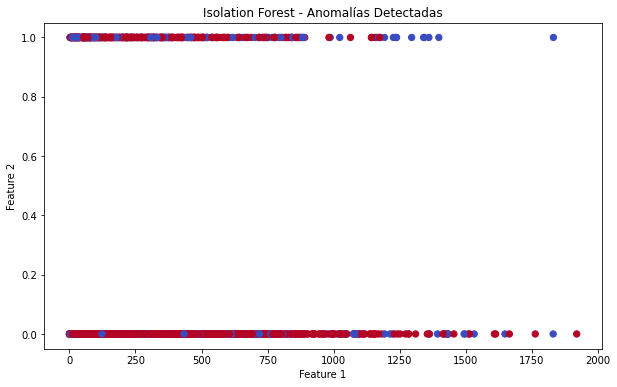

In [50]:
import matplotlib.pyplot as plt

X_np = X.to_numpy()

plt.figure(figsize=(10,6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_pred, cmap="coolwarm", s=40)
plt.title("Isolation Forest - Anomalías Detectadas")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


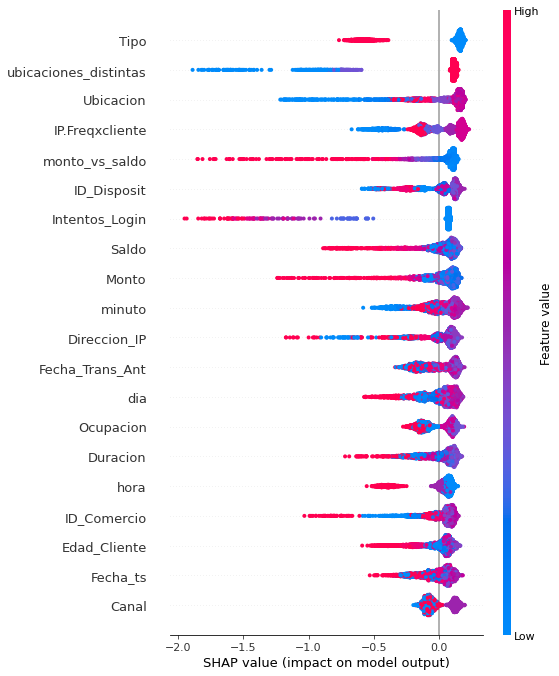

In [51]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


In [52]:
df['score'] = scores
df.sort_values('score').head(20)  # los 20 más raros


,Monto,Tipo,Ubicacion,ID_Disposit,Direccion_IP,ID_Comercio,Canal,Edad_Cliente,Ocupacion,Duracion,...,año,mes,dia,hora,minuto,monto_vs_saldo,ubicaciones_distintas,IP.Freqxcliente,Fraude,score
1616,34.74,1,42,9,5,19,2,59,3,72,...,2023,4,28,16,3,0.009295,17,63,0,-0.112333
2124,737.46,1,41,7,3,23,0,53,1,75,...,2023,1,3,16,28,1.161062,22,217,0,-0.103740
1375,221.49,1,68,9,6,27,0,23,0,196,...,2023,9,13,18,11,0.312729,17,63,1,-0.099108
1491,506.26,1,51,8,13,33,1,64,3,86,...,2023,12,18,18,26,0.080773,19,120,0,-0.096102
898,1531.31,0,59,3,8,25,2,18,0,62,...,2023,10,23,18,0,1.778814,22,435,0,-0.092836
229,630.24,0,61,9,3,27,1,21,0,62,...,2023,11,29,18,10,1.695059,17,63,0,-0.092460
625,821.54,1,61,9,2,24,0,79,3,36,...,2023,8,22,18,11,0.203285,17,63,0,-0.092440
151,332.93,1,41,9,6,25,0,35,2,293,...,2023,11,20,16,29,0.119364,17,63,0,-0.092430
1635,40.12,1,49,9,5,22,1,36,1,269,...,2023,4,19,17,3,0.002805,17,63,0,-0.091573
274,1176.28,1,61,4,4,27,1,54,2,174,...,2023,12,20,16,8,3.622779,22,596,0,-0.091274


In [55]:
pred = model.fit_predict(X)
outliers = (pred == -1).mean()
print(outliers)

0.1500796178343949


Isolation Forest no se evalua con matriz de confusion puesto que es un modelo no supervisado.